In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=25) 
from astropy.table import Table
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [2]:
def read_data():
    '''Reads in the Yu et al. 2018 data'''
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

In [3]:
def rhatplots(mls, kind, bands, cnc, crc):
    overliers = np.array([0., 0.])
    total = np.array([0., 0.])
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
    for ts in np.arange(-50., 60., 10.):
        temp = str(ts)
        rhats1 = np.genfromtxt(glob.glob(__outdir__+mls[0]+'_'+cnc+'/'+kind+'_'+temp+'_rhats.txt')[0])
        sns.distplot(rhats1, ax=ax1)
        total[0] += len(rhats1)
        overliers[0] += len(rhats1[rhats1 > 1.01])
        rhats1 = np.genfromtxt(glob.glob(__outdir__+mls[0]+'_'+crc+'/'+kind+'_'+temp+'_rhats.txt')[0])
        sns.distplot(rhats1, ax=ax1)
        total[0] += len(rhats1)
        overliers[0] += len(rhats1[rhats1 > 1.01])        
        
        
        rhats2 = np.genfromtxt(glob.glob(__outdir__+mls[1]+'_'+cnc+'/'+kind+'_'+temp+'_rhats.txt')[0])
        sns.distplot(rhats2, ax=ax2)       
        total[1] += len(rhats2)
        overliers[1] += len(rhats2[rhats2 > 1.01])
        rhats2 = np.genfromtxt(glob.glob(__outdir__+mls[1]+'_'+crc+'/'+kind+'_'+temp+'_rhats.txt')[0])
        sns.distplot(rhats2, ax=ax2)       
        total[1] += len(rhats2)
        overliers[1] += len(rhats2[rhats2 > 1.01])        
        
        
    ax1.axvline(1.01, c='r', linestyle='-.', label= str(int(overliers[0]))+' of '+str(int(total[0]))+' $>$ 1.01')
    ax2.axvline(1.01, c='r', linestyle='-.', label= str(int(overliers[1]))+' of '+str(int(total[1]))+' $>$ 1.01')
    ax1.legend(loc='best', fontsize=20)
    ax2.legend(loc='best',fontsize=20)

    ax1.set(xlabel=r'$\hat{R}$', ylabel='Counts')
    ax1.set_title(bands[0]+' band',fontsize=25)
    ax2.set(xlabel=r'$\hat{R}$', ylabel='Counts')
    ax2.set_title(bands[1]+' band',fontsize=25)   
    fig.tight_layout()
    plt.show()

In [4]:
def violinplot(mls, kind, bands, cnc, crc, save=''):
    music1 = read_music(mls[0], kind, bands[0], cnc, crc)
    music2 = read_music(mls[1], kind, bands[1], cnc, crc)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
    sns.violinplot(music1.tempscales.astype(int).values, music1.chains.values, hue=music1.ncrc.values,
                        palette='Set2',split=True, inner='quartile', ax = ax1)

    sns.violinplot(music2.tempscales.astype(int).values, music2.chains.values, hue=music2.ncrc.values,
                    palette='Set2',split=True, inner='quartile', ax = ax2)
    ax1.grid()
    ax1.set_axisbelow(True)
    ax2.grid()
    ax2.set_axisbelow(True)  
    ax1.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel='Position of RC in '+bands[0]+' band (mag)')
    ax1.set_title(bands[0]+' band',fontsize=25)
    ax2.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel='Position of RC in '+bands[1]+' band (mag)')
    ax2.set_title(bands[1]+' band',fontsize=25)    
    plt.setp(ax1.get_legend().get_texts(), fontsize='25')
    plt.setp(ax2.get_legend().get_texts(), fontsize='25')
    fig.tight_layout()
    
    if save is not '':
        plt.savefig(save)
    plt.show()
    
def read_music(ml, kind, band, cnc, crc):
    chains = np.array([])
    tempscales = np.array([])
    ncrc = np.array([])

    for ts in np.arange(-50.,60.,10.):
        temp = str(ts)
        #Add NC chains & labels
        chain = np.genfromtxt(glob.glob(__outdir__+ml+'_'+cnc+'/'+kind+'_'+temp+'_chains.txt')[0])[0]
        chains = np.append(chains, chain)
        tempscales = np.append(tempscales, np.ones(len(chain))*ts)
        ncrc = np.append(ncrc, ['No Correction']*len(chain))

        #Add RC chains & labels
        chain = np.genfromtxt(glob.glob(__outdir__+ml+'_'+crc+'/'+kind+'_'+temp+'_chains.txt')[0])[0]
        chains = np.append(chains, chain)
        tempscales = np.append(tempscales, np.ones(len(chain))*ts)
        ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

    music = pd.DataFrame()
    music['chains'] = chains
    music['tempscales'] = tempscales
    music['ncrc'] = ncrc
    return music

In [5]:
df = read_data()

# Run with a single set of BCs
## No Teff perturbed, no Logg perturbed
These BCs are calculated from BCcodes bcall with extinction set to 0.

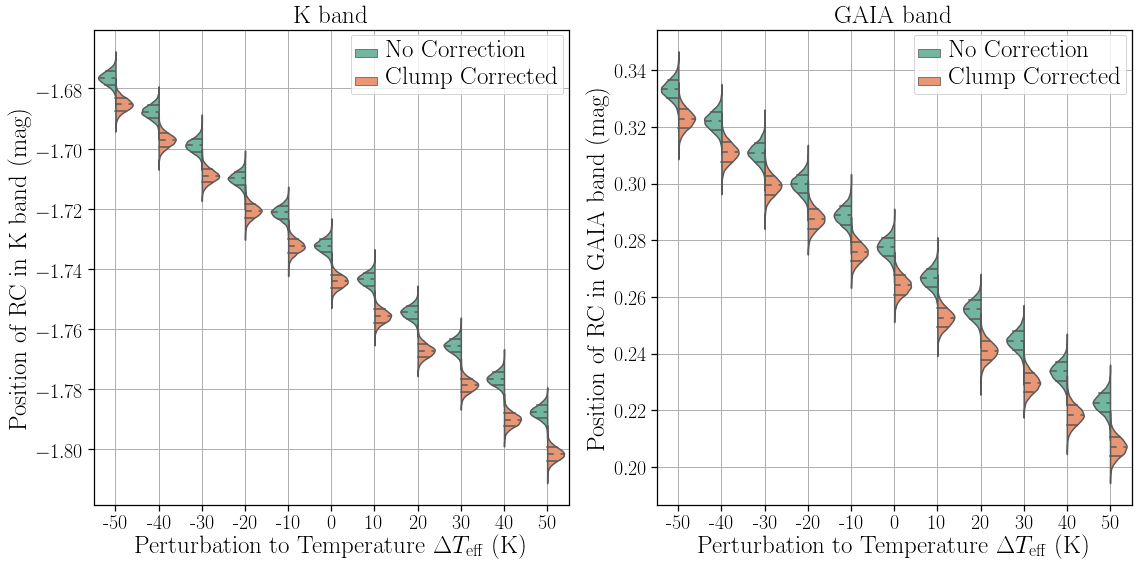

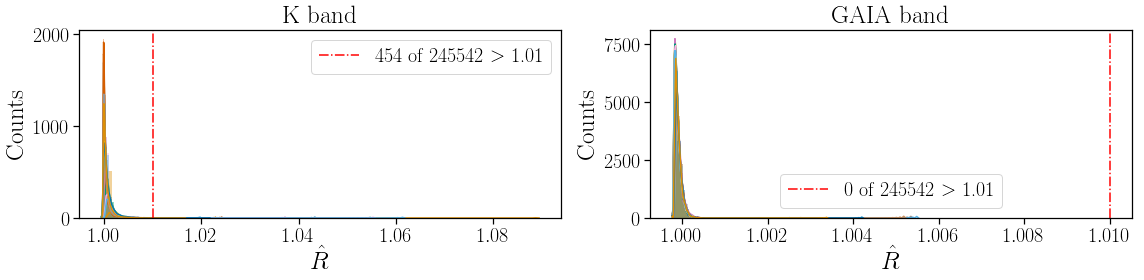

In [6]:
mls = ['Expired_runs/nn_K_tempscale', 'Expired_runs/nn_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
violinplot(mls, kind, bands, cnc, crc)
rhatplots(mls, kind, bands, cnc, crc)

# Run with a full set of *N* BCs (where *N* is the number of points)
## Teff perturbed, no Logg perturbed
These BCs are calculated from BCcodes bcall with extinction set to 0.

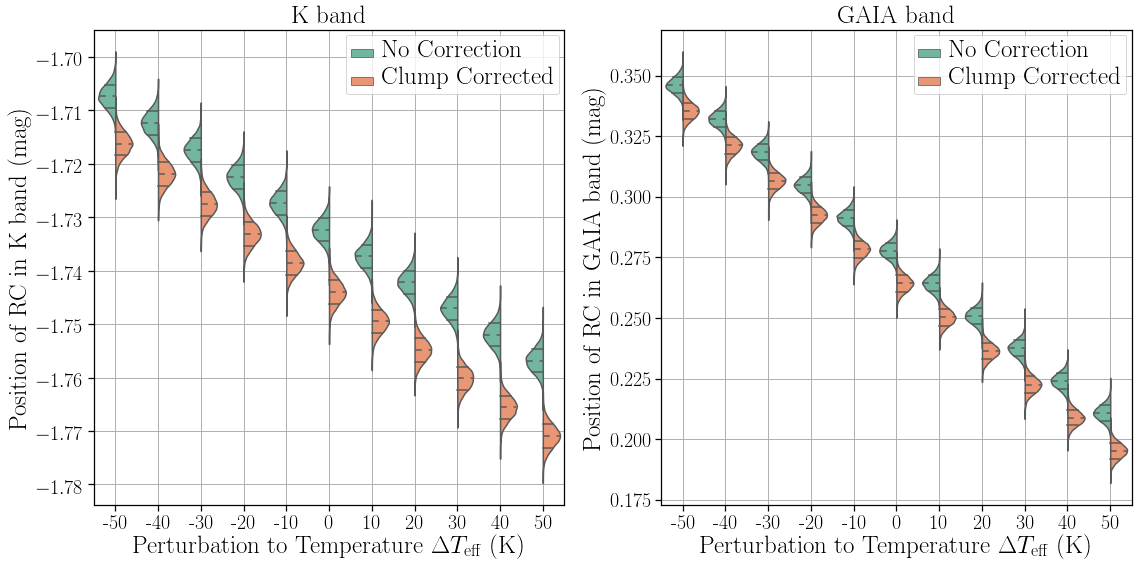

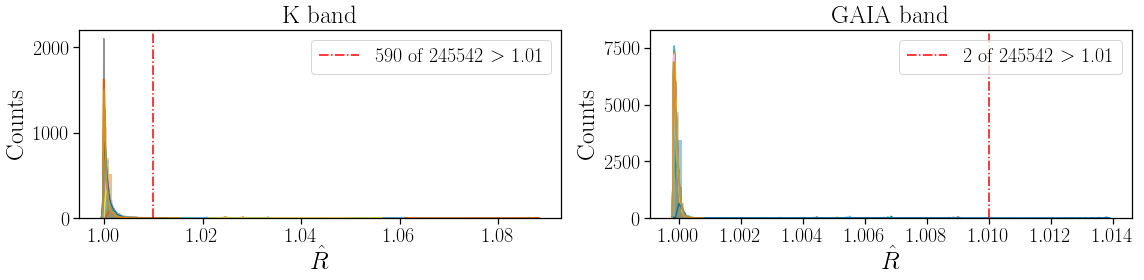

In [7]:
mls = ['Expired_runs/nt_K_tempscale', 'Expired_runs/nt_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
violinplot(mls, kind, bands, cnc, crc)
rhatplots(mls, kind, bands, cnc, crc)

## Teff perturbed,  Logg perturbed
These BCs are calculated from BCcodes bcall with extinction set to 0.

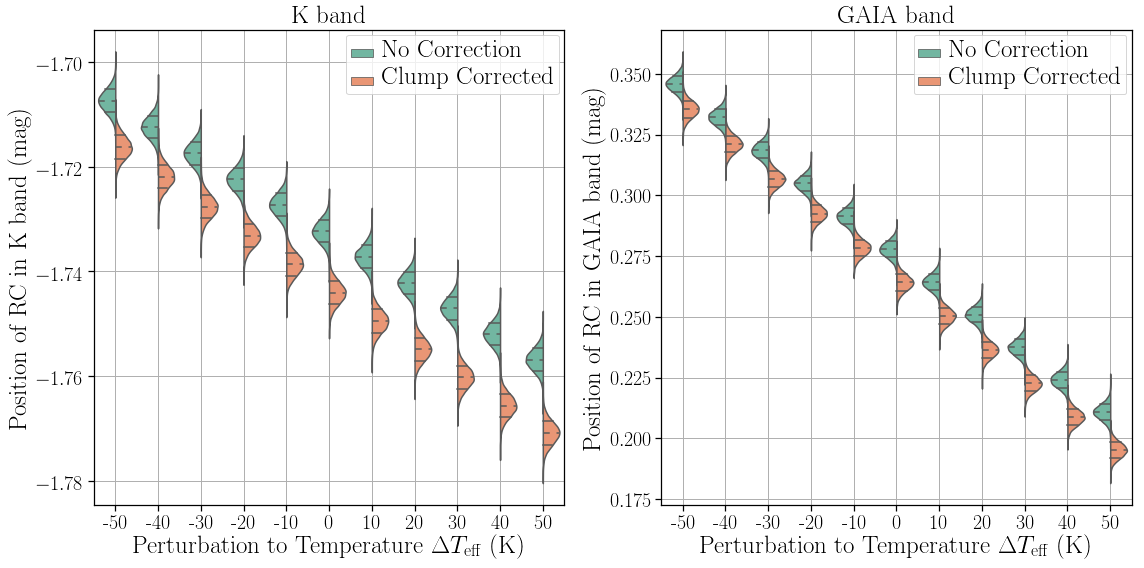

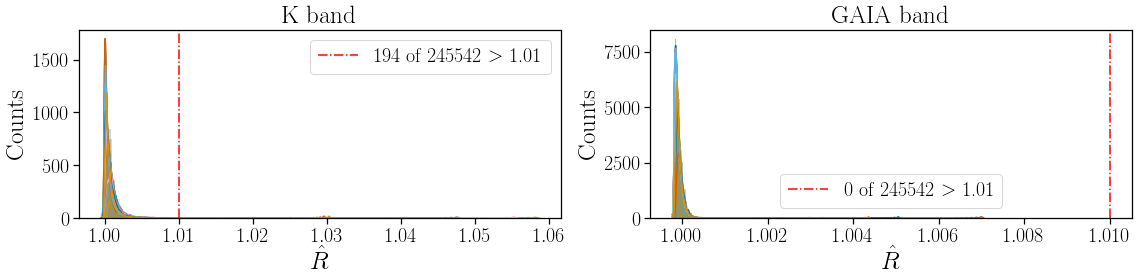

In [8]:
mls = ['lt_K_tempscale', 'pre-4chainruns/lt_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
violinplot(mls, kind, bands, cnc, crc, save='/home/oliver/Dropbox/Papers/Hall+18/Figures/lt_posteriors.pdf')
rhatplots(mls, kind, bands, cnc, crc)

# Run on a full set of *N* BCs, for APOKASC stars

## APOKASC Teff only

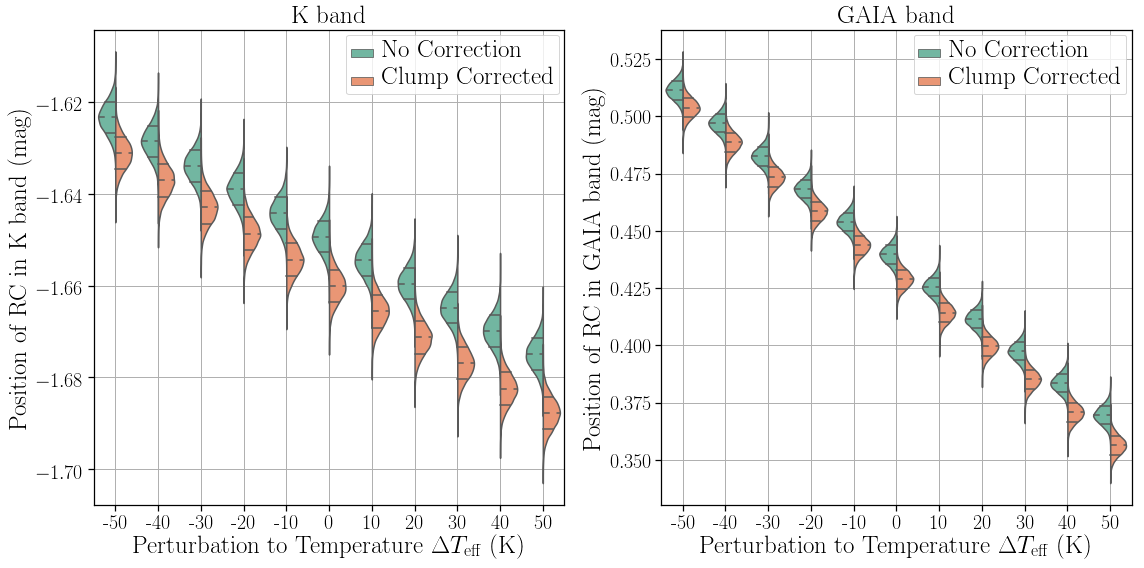

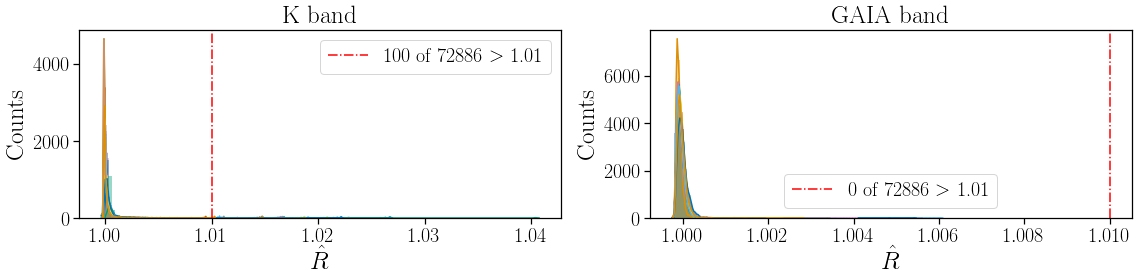

In [9]:
mls = ['APOKASC_K_tempscale', 'APOKASC_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
violinplot(mls, kind, bands, cnc, crc)
rhatplots(mls, kind, bands, cnc, crc)

## APOKASC Teff, numax, dnu and fdnu

In [13]:
mls = ['APOFULL_K_tempscale', 'APOFULL_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
violinplot(mls, kind, bands, cnc, crc)
rhatplots(mls, kind, bands, cnc, crc)

IndexError: list index out of range

# Lets investigate the chains for the last one

In [11]:
def chainplots(ml, kind, band, cor, temp):
    chains = np.genfromtxt(glob.glob(__outdir__+ml+'_'+cor+'/'+kind+'_'+temp+'_chains.txt')[0])
    rhats = np.genfromtxt(glob.glob(__outdir__+ml+'_'+cor+'/'+kind+'_'+temp+'_rhats.txt')[0])

    t = np.arange(len(chains[0]))
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 8), sharex=True)
    ax1.plot(t[:5000],chains[0][:5000])
    ax2.plot(t[:5000],chains[1][:5000])
    ax3.plot(t[:5000],chains[2][:5000])
    ax4.plot(t[:5000],chains[3][:5000])
    
    ax1.plot(t[5000:10000],chains[0][5000:10000])
    ax2.plot(t[5000:10000],chains[1][5000:10000])
    ax3.plot(t[5000:10000],chains[2][5000:10000])
    ax4.plot(t[5000:10000],chains[3][5000:10000])
    
    ax1.plot(t[10000:15000],chains[0][10000:15000])
    ax2.plot(t[10000:15000],chains[1][10000:15000])
    ax3.plot(t[10000:15000],chains[2][10000:15000])
    ax4.plot(t[10000:15000],chains[3][10000:15000])
    
    ax1.plot(t[15000:],chains[0][15000:])
    ax2.plot(t[15000:],chains[1][15000:])
    ax3.plot(t[15000:],chains[2][15000:])
    ax4.plot(t[15000:],chains[3][15000:])    

    ax1.set_ylabel(r'$\mu_{\rm RC}$')
    ax2.set_ylabel(r'$\sigma$')
    ax3.set_ylabel(r'$Q$')
    ax4.set_ylabel(r'$\sigma_o$')
    ax1.set_title(r'$\hat{R}$ = '+str(np.round(rhats[0],3)), fontsize=25)
    ax2.set_title(r'$\hat{R}$ = '+str(np.round(rhats[1],3)), fontsize=25)
    ax3.set_title(r'$\hat{R}$ = '+str(np.round(rhats[2],3)), fontsize=25)
    ax4.set_title(r'$\hat{R}$ = '+str(np.round(rhats[3],3)), fontsize=25)
    fig.suptitle(r'$\Delta T_{\rm eff}$ = '+ temp + ' '+cor+' Band: '+band, fontsize=25)

    plt.show()

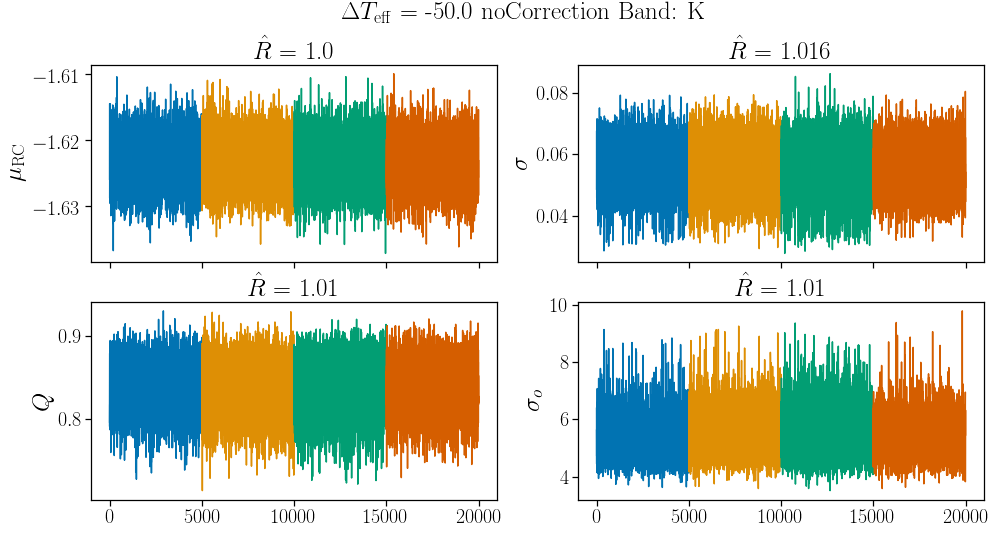

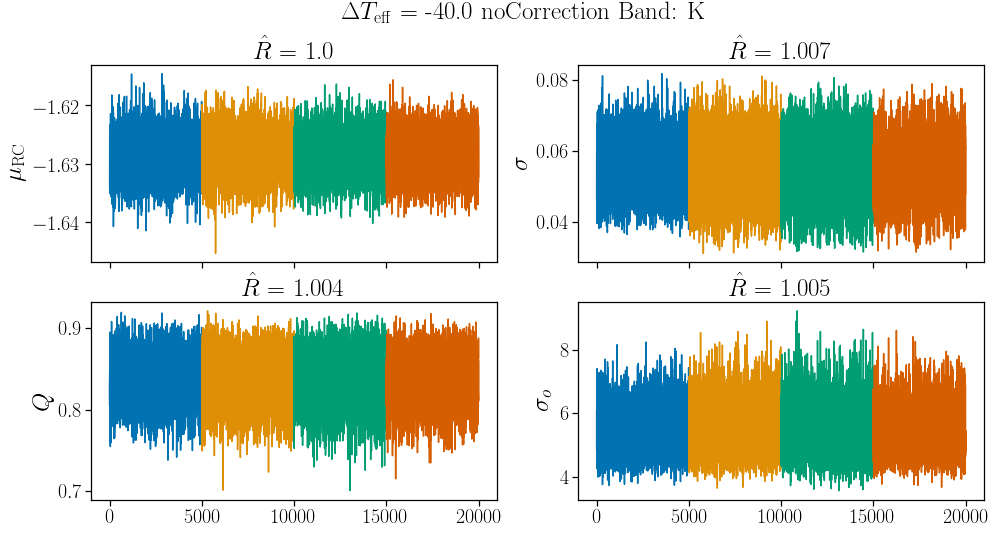

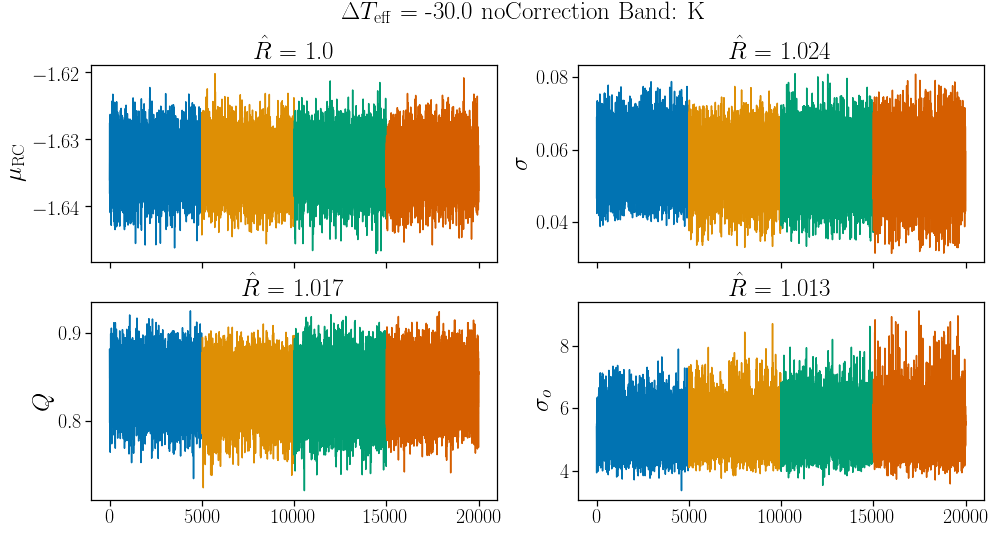

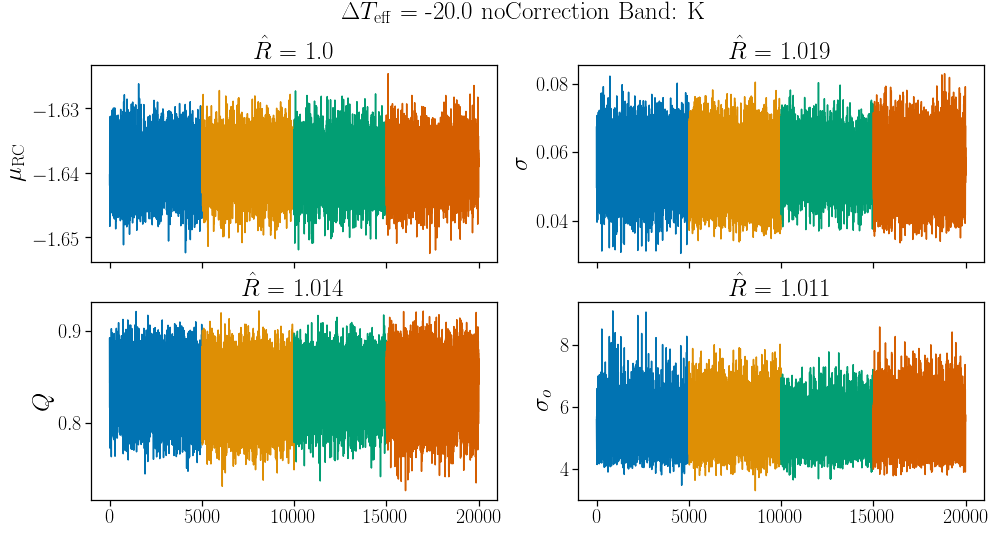

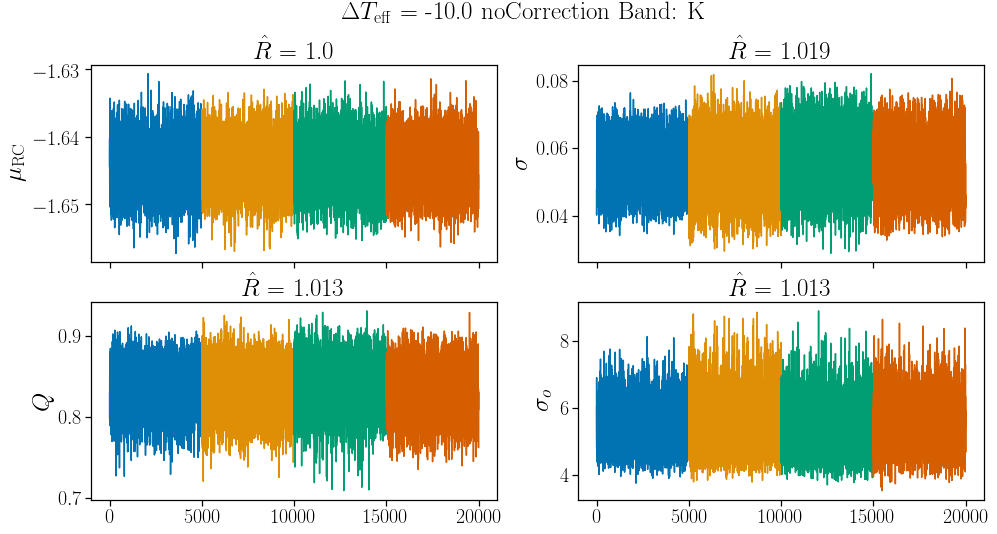

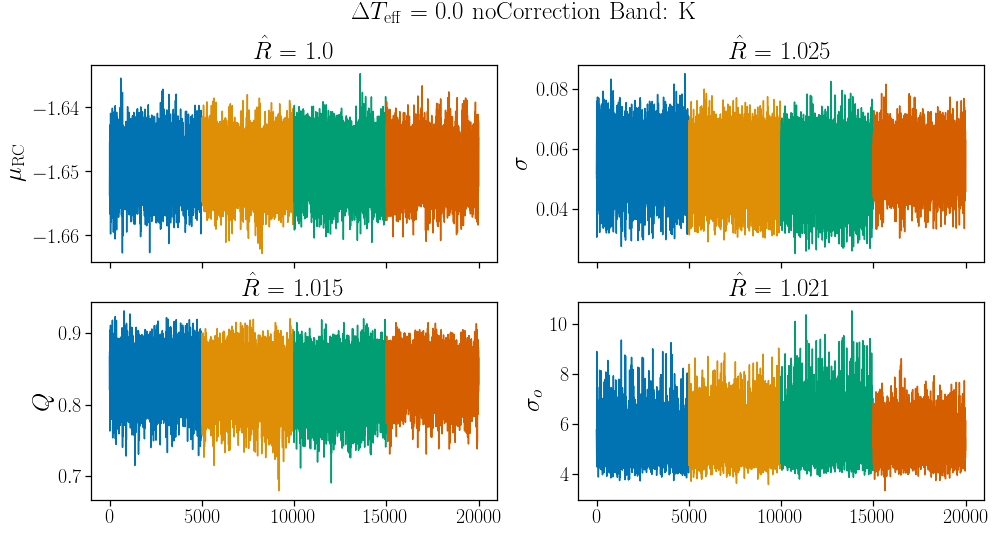

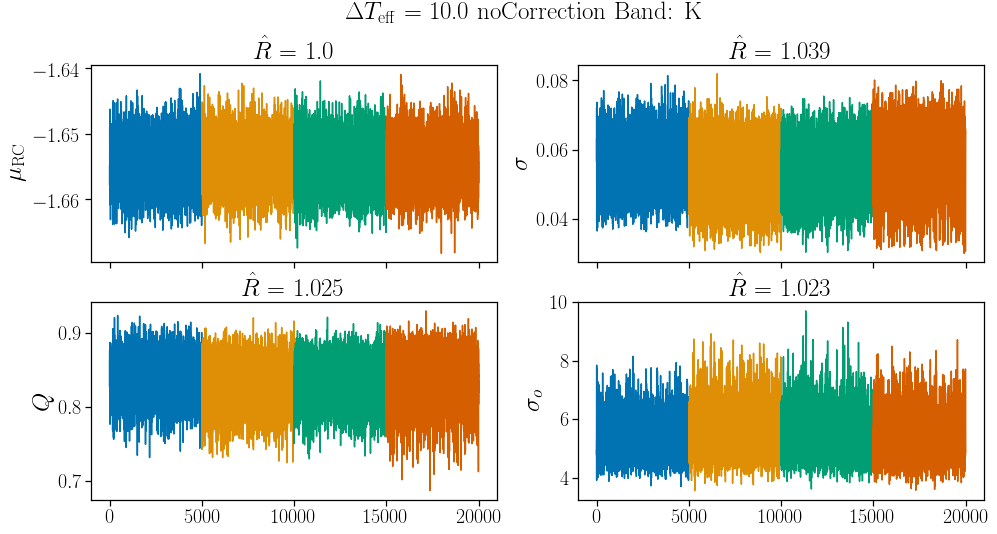

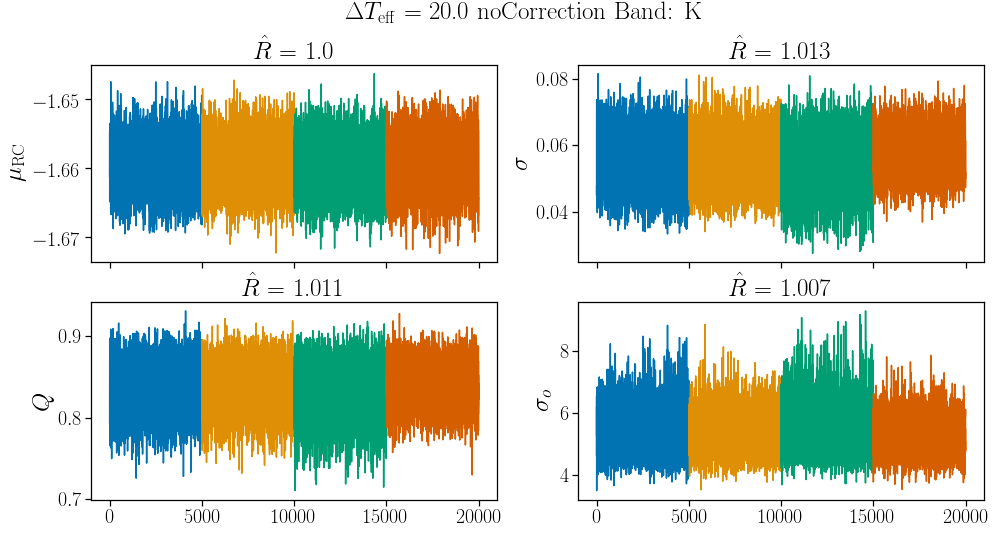

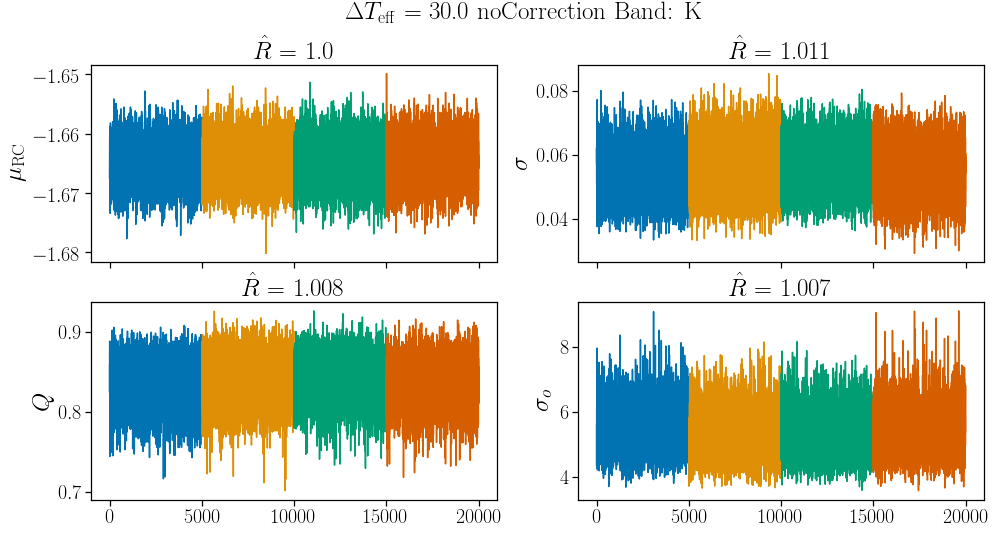

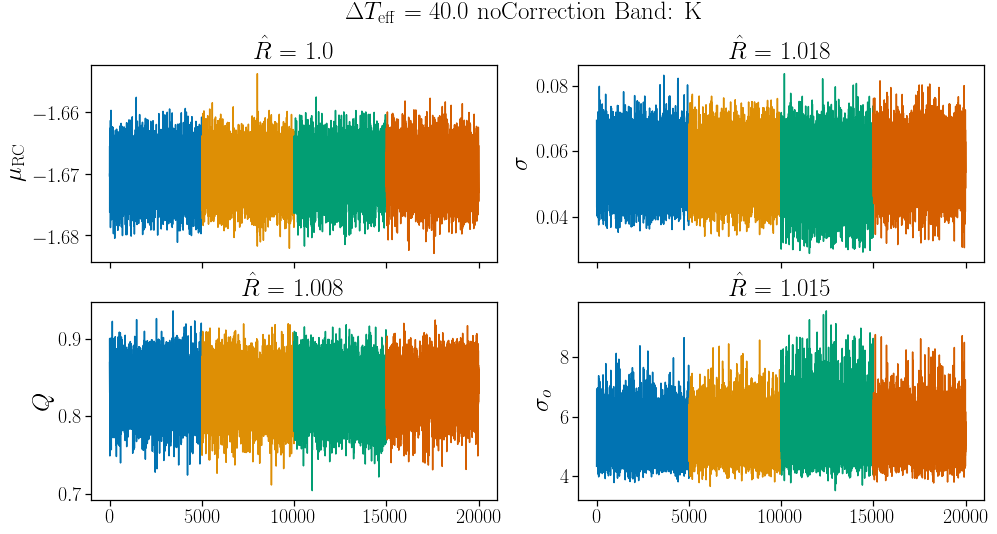

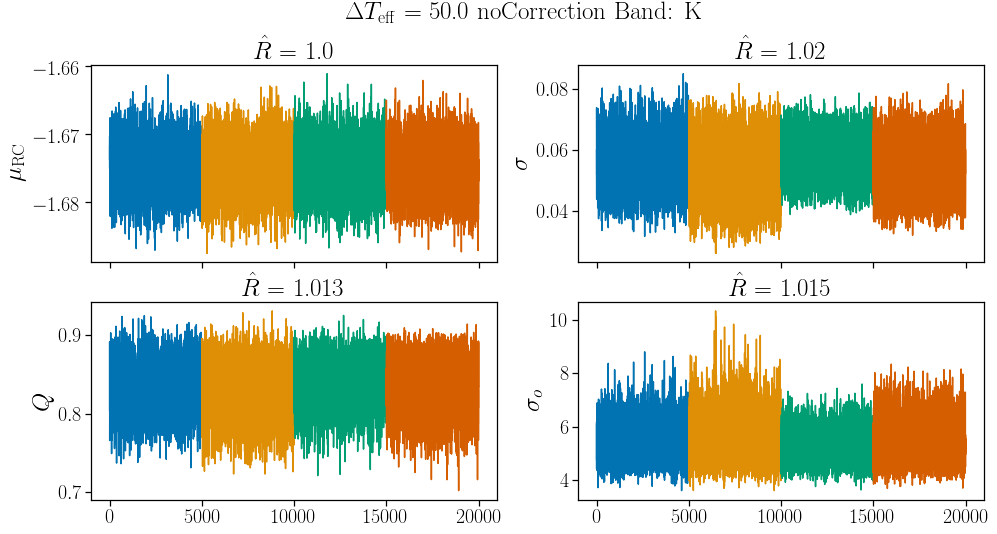

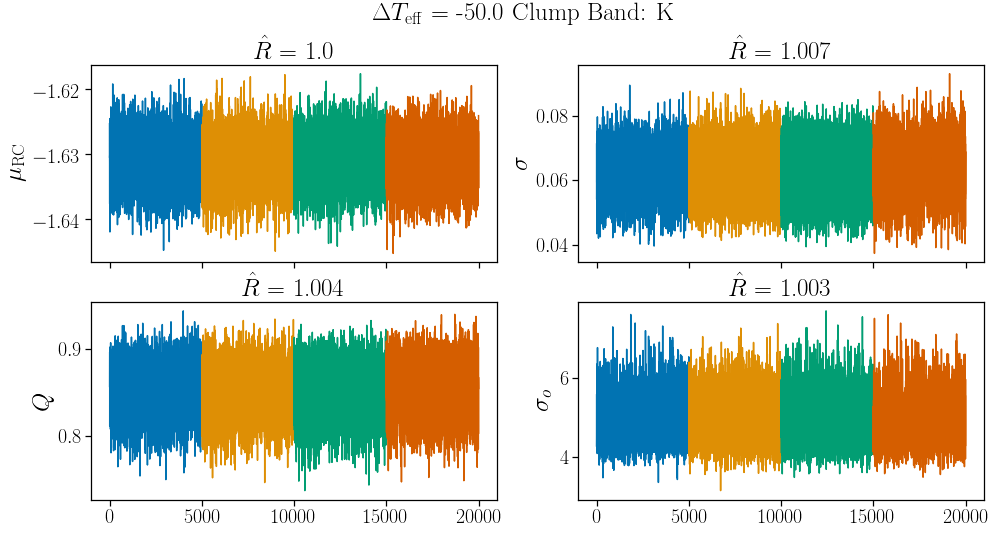

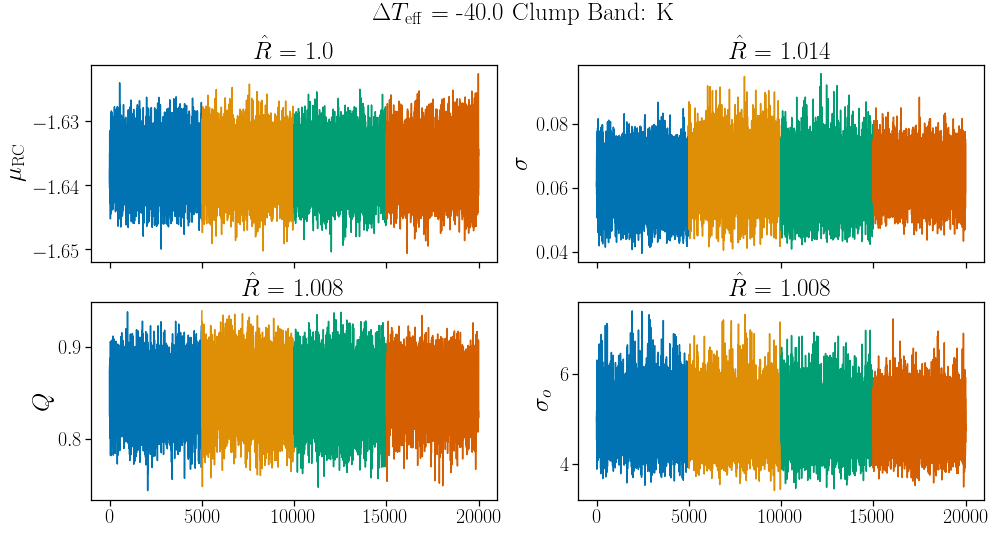

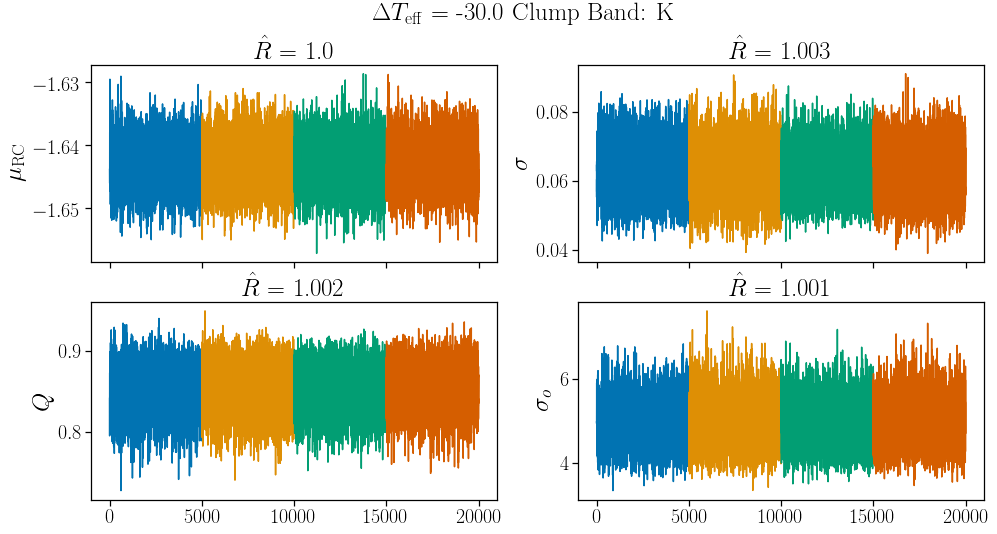

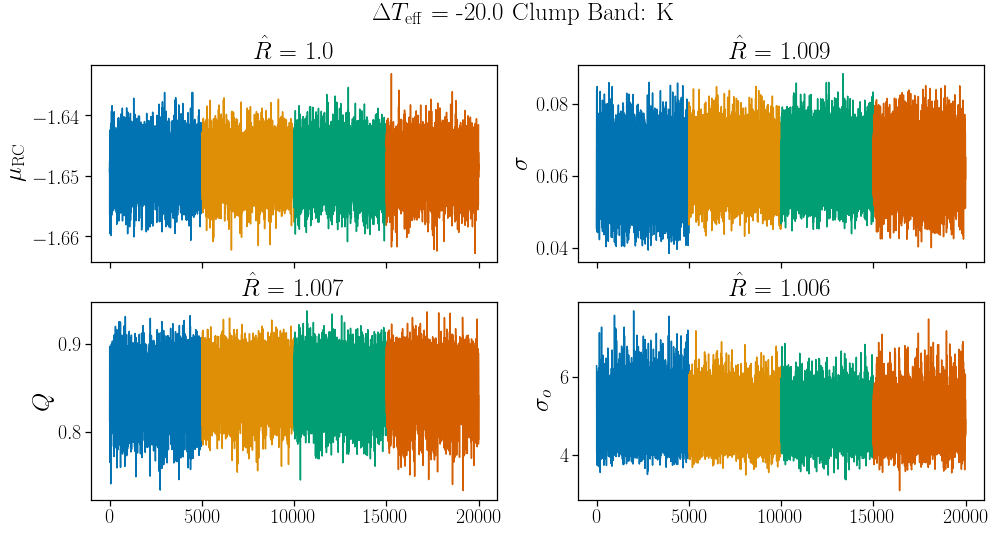

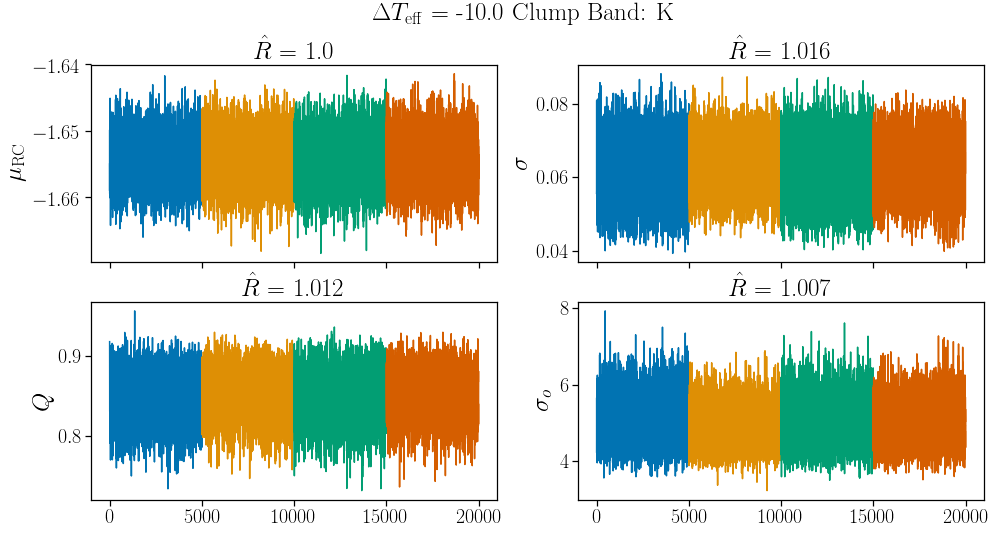

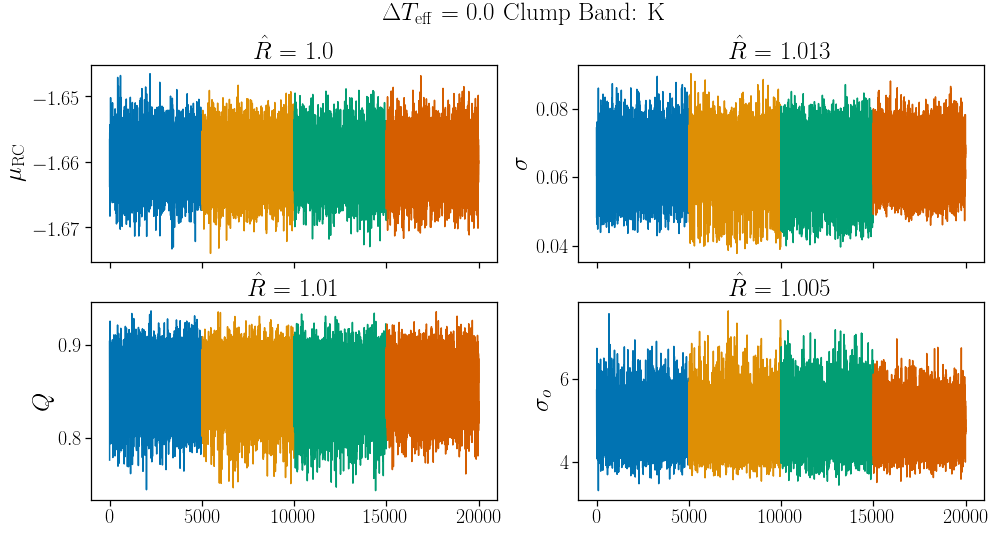

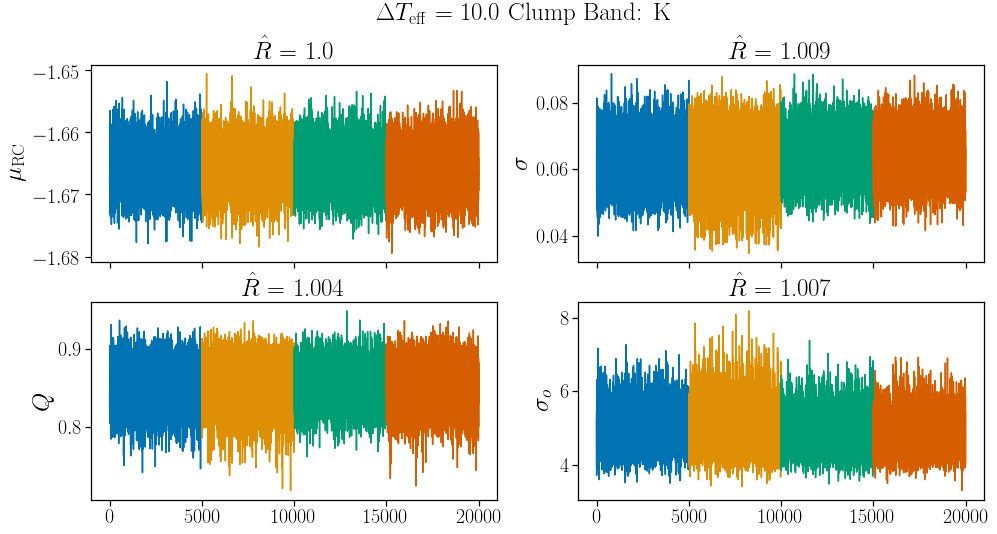

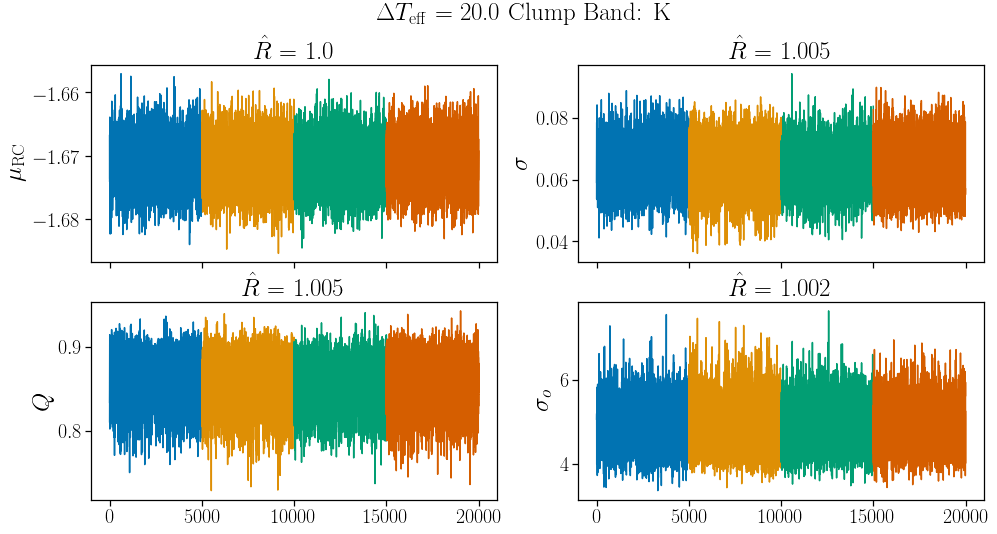

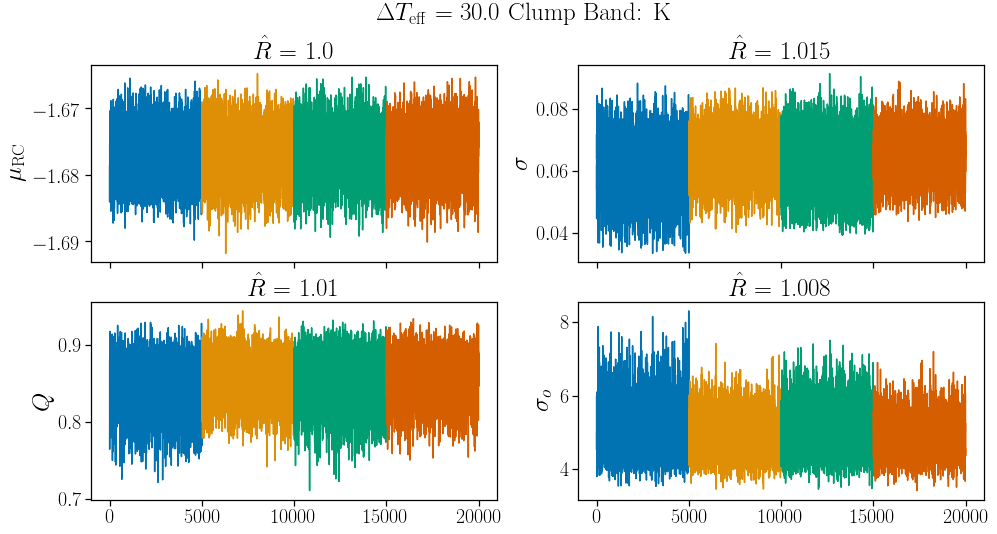

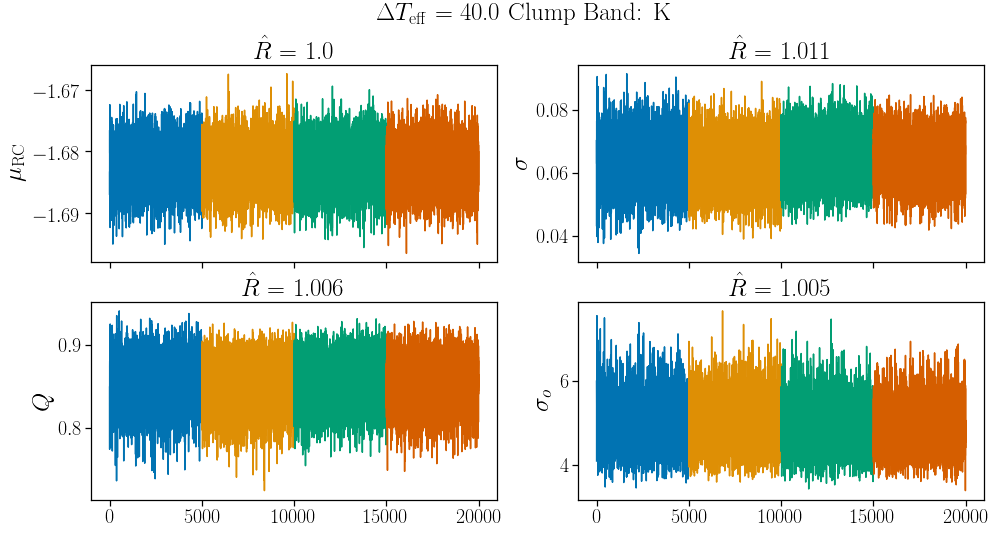

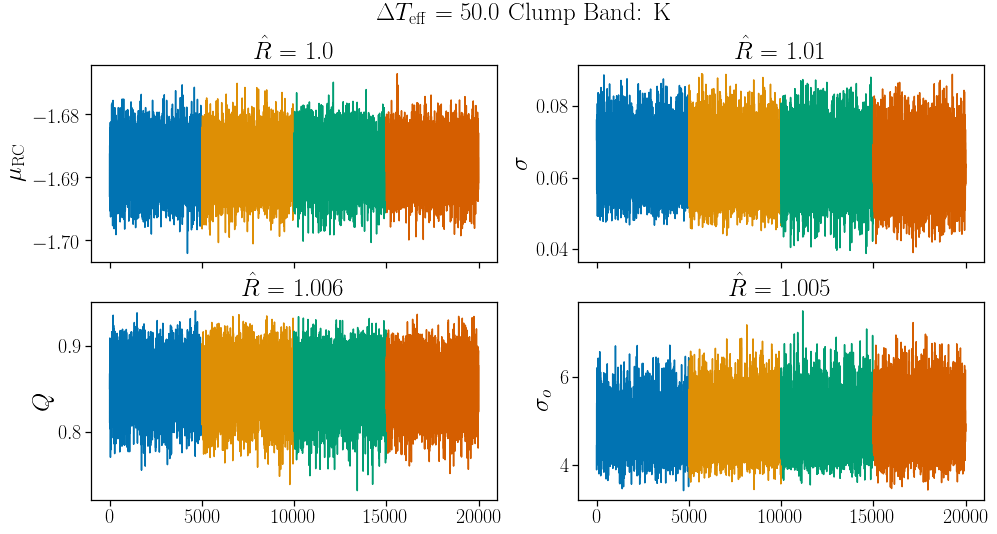

In [12]:
# mls = ['lt_K_tempscale', 'lt_GAIA_tempscale']
mls = ['APOKASC_K_tempscale', 'APOKASC_GAIA_tempscale']
kind = 'astero'
bands = ['K', 'GAIA']
cnc = 'noCorrection'
crc = 'Clump'
temp = '0.0'

for ts in np.arange(-50., 60., 10.):
    chainplots(mls[0], 'astero', 'K', cnc, str(ts))
    
for ts in np.arange(-50., 60., 10.):
    chainplots(mls[0], 'astero', 'K', crc, str(ts))    